In [1]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks

# Data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:

from plotly.offline import iplot, init_notebook_mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

## Let's explore datasets

### Explore input dataset

Will use target dataset [Bitcoin in Cryptocurrency Historical Prices](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv)

Bitcoin data at 1-day intervals from April 28, 2013

In [3]:
from src.load_datasets import load_input_dataset

input_dataset = load_input_dataset()

input_dataset.head()

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

Will explore full input dataset

                                             |          | [  0%]   00:00 -> (? left)


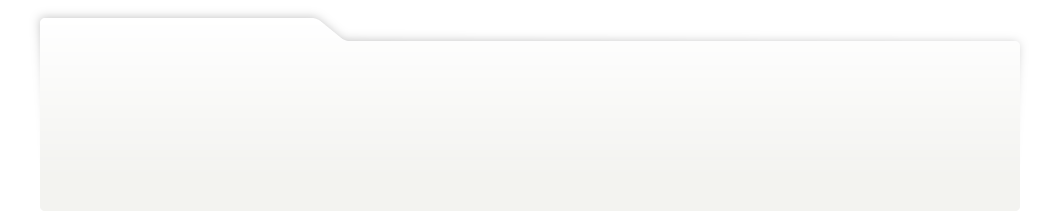
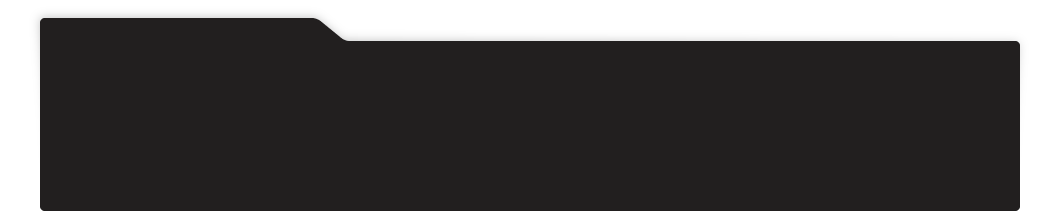
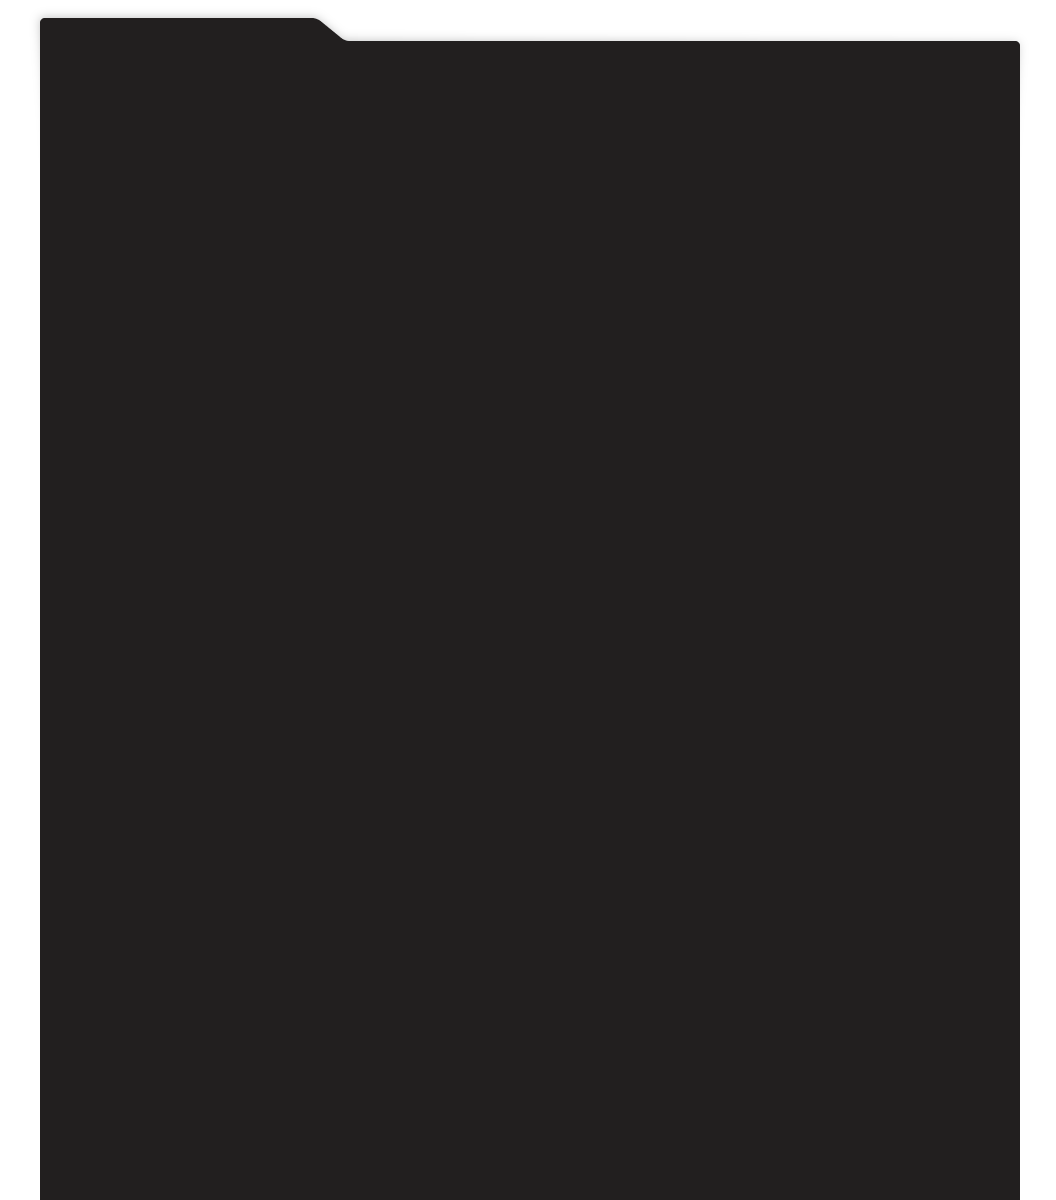
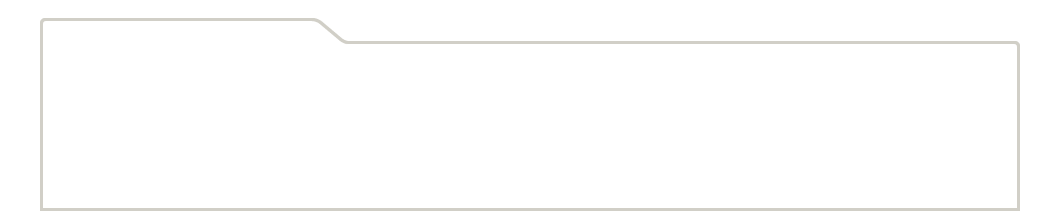
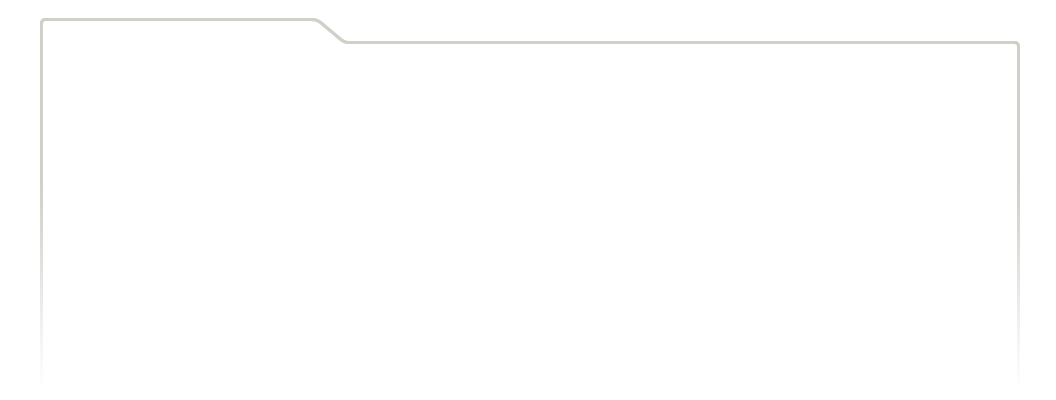
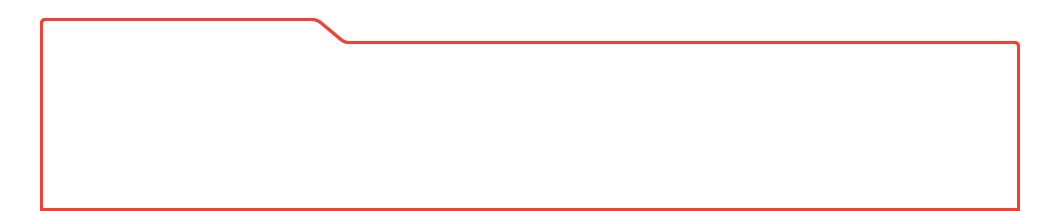
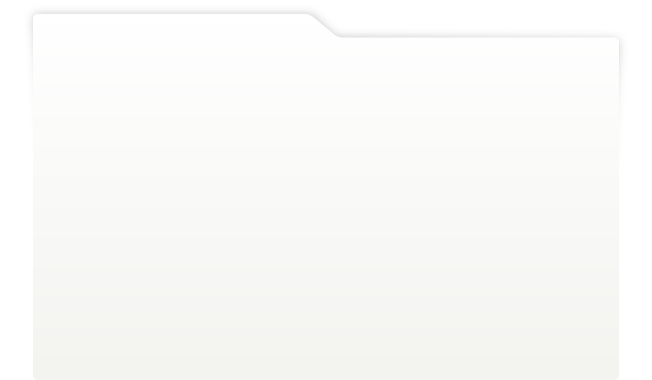
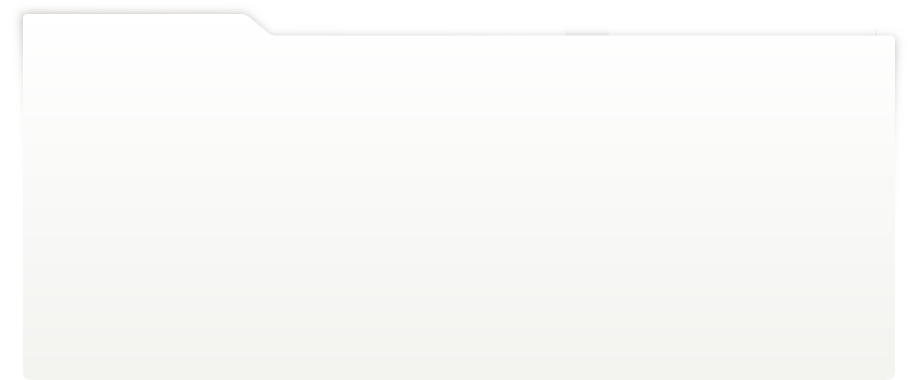
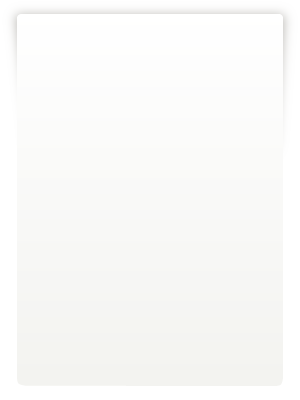
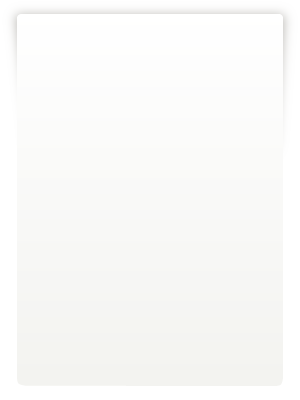
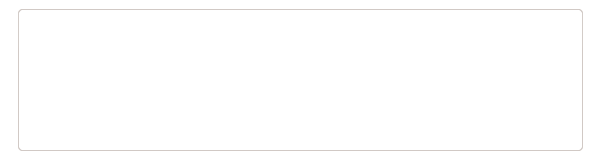
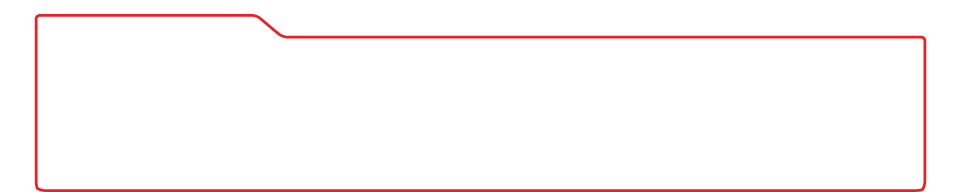
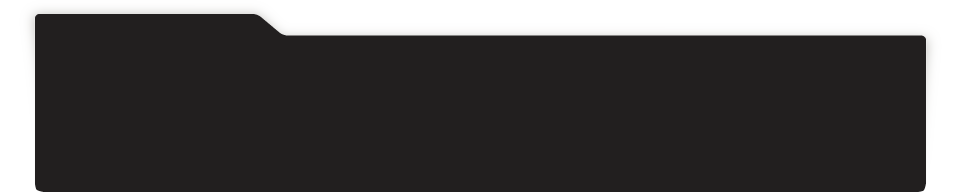
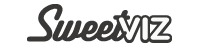
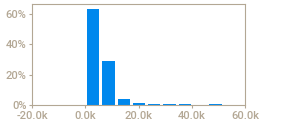
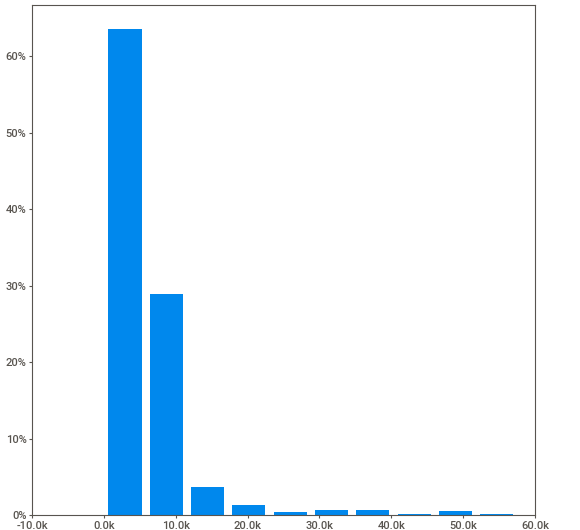
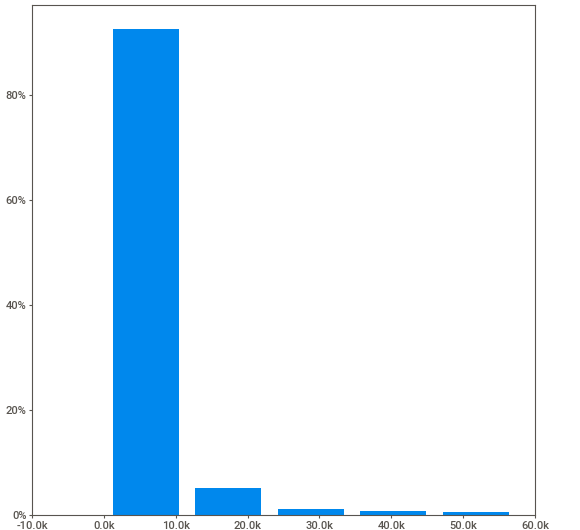
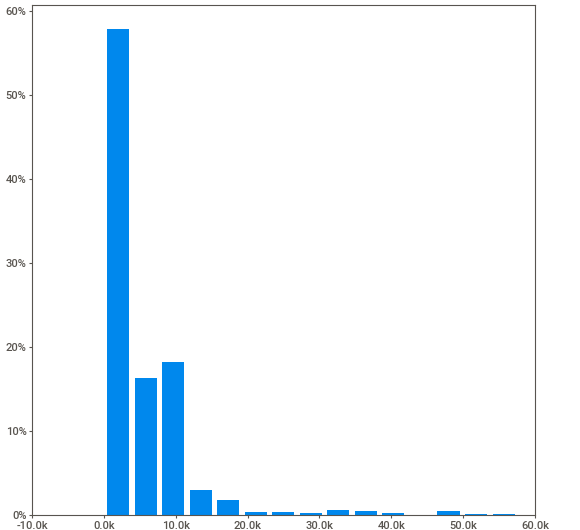
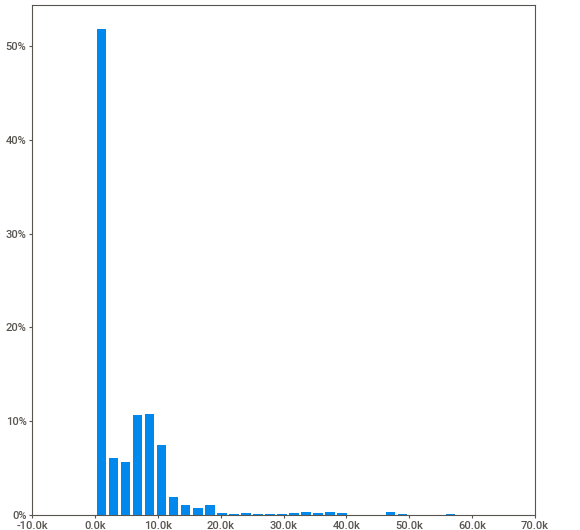
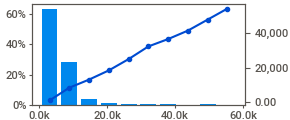
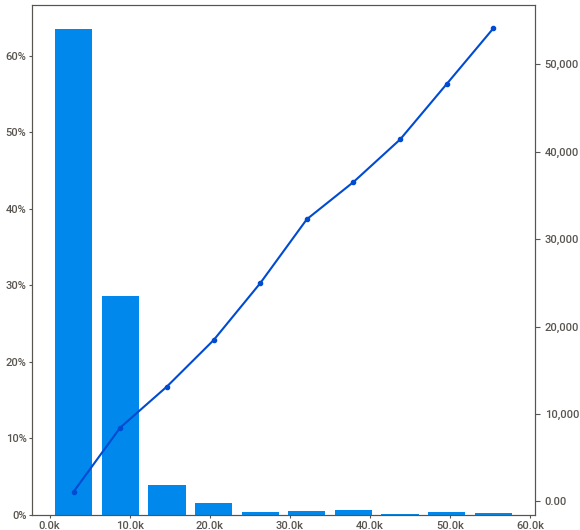
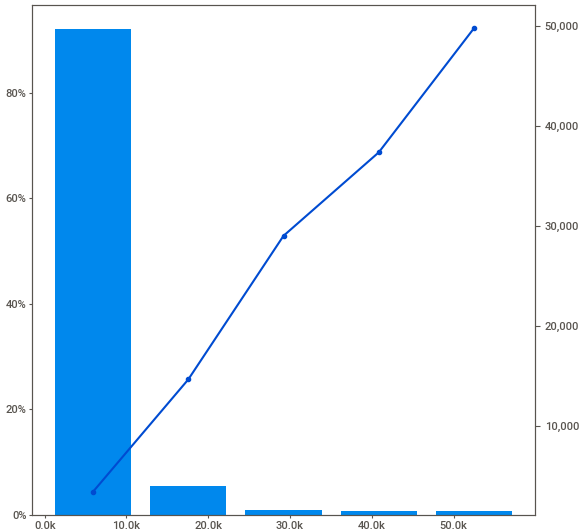
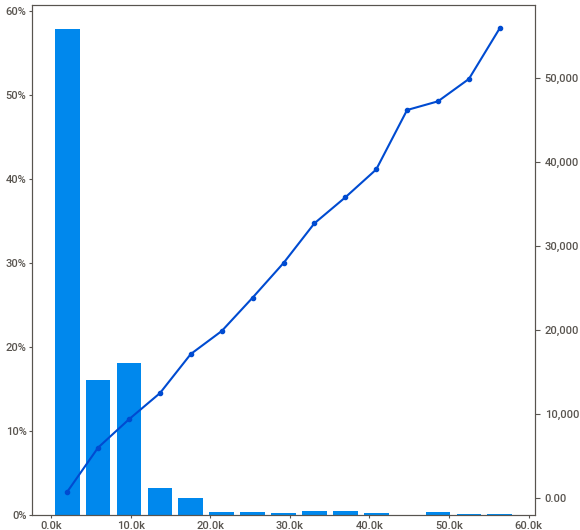
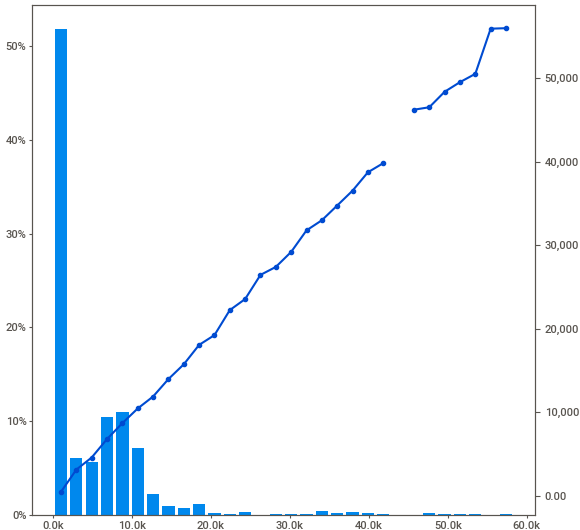
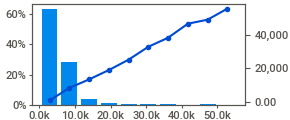
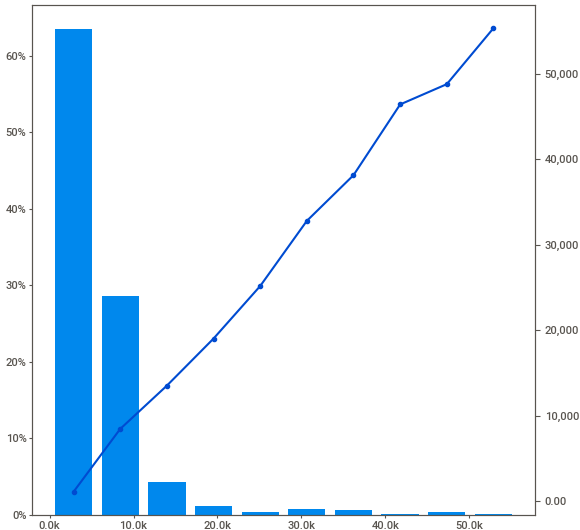
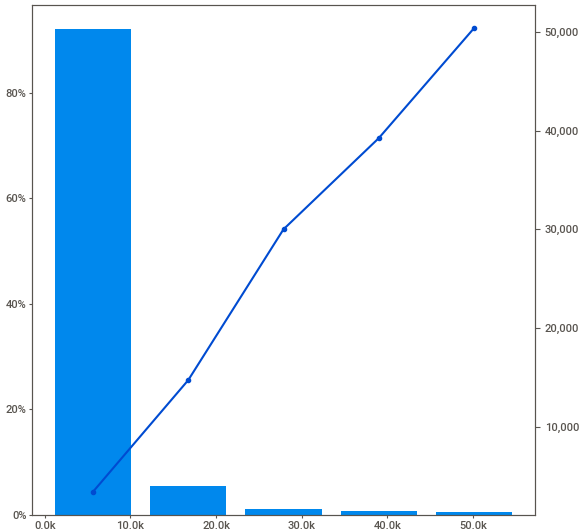
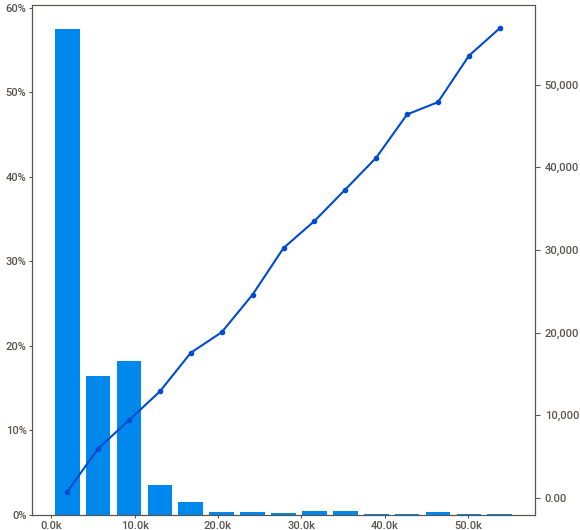
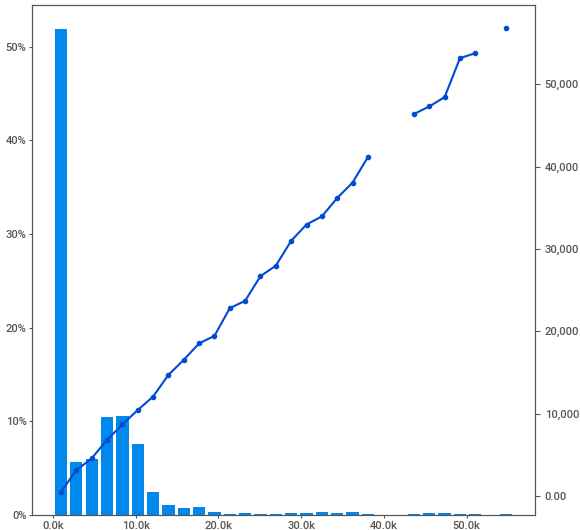
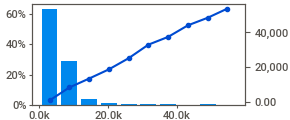
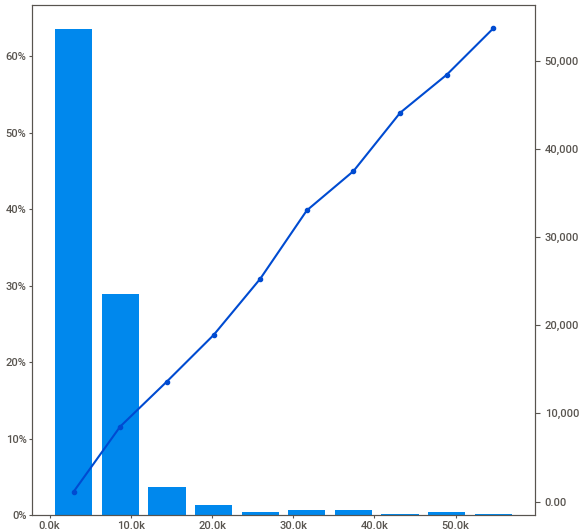
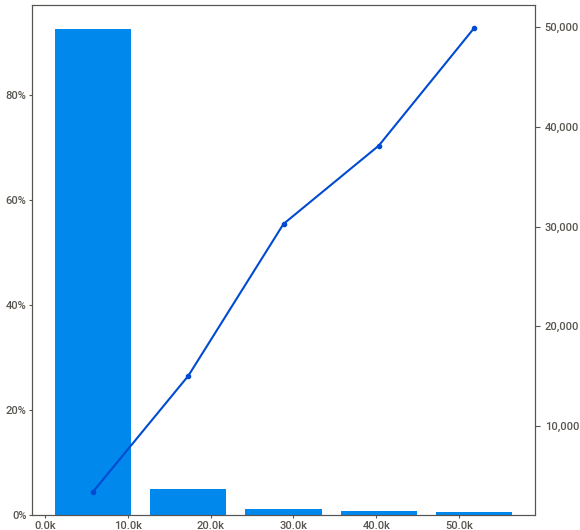
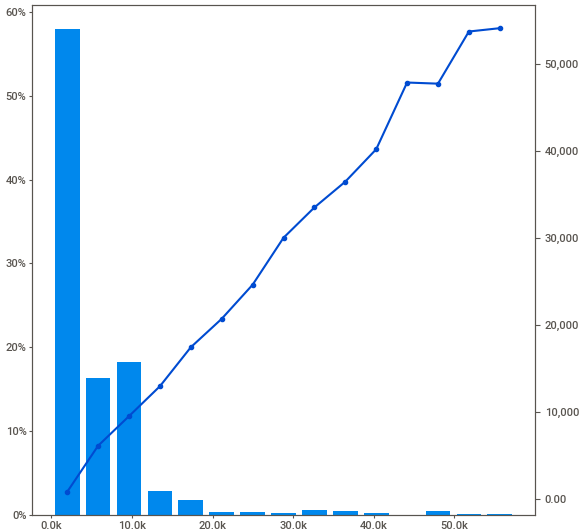
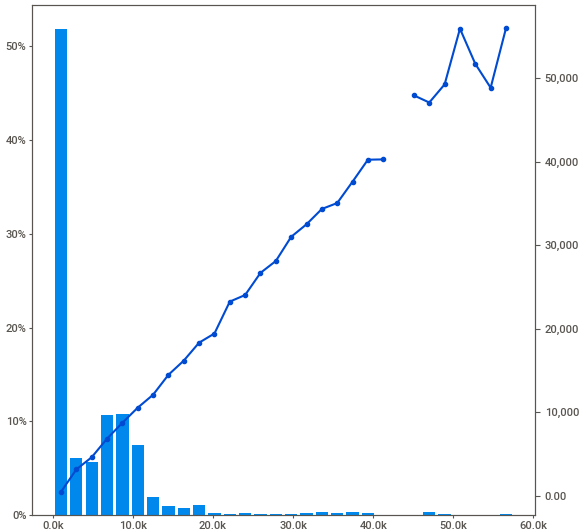
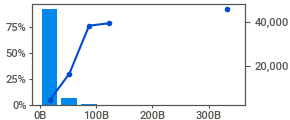
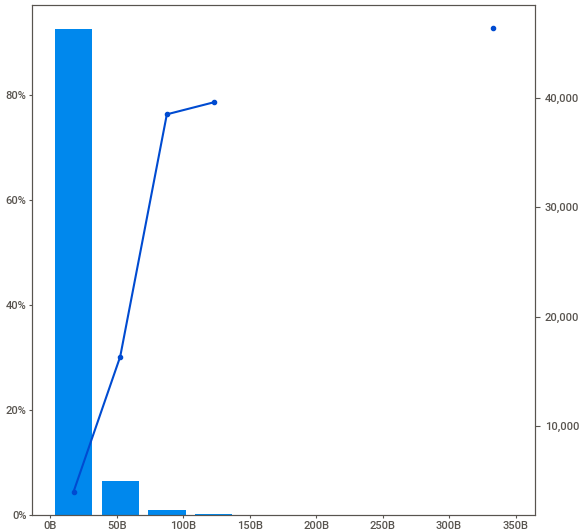
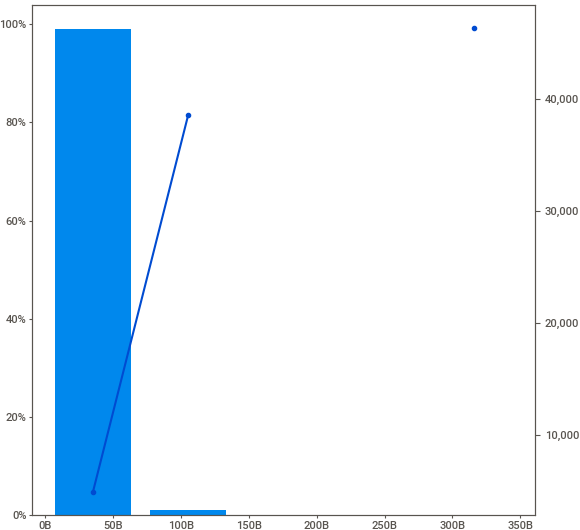
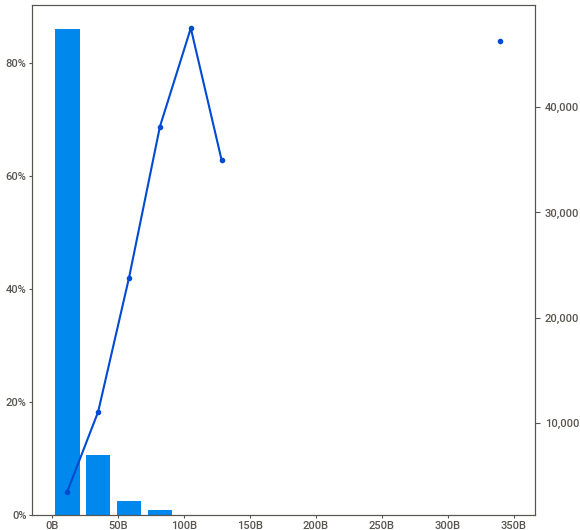
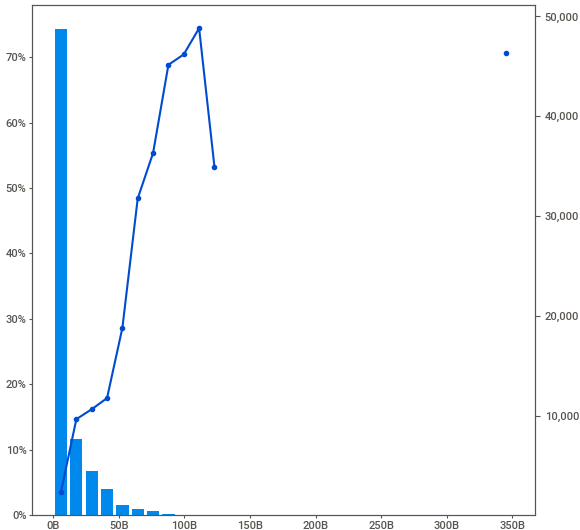
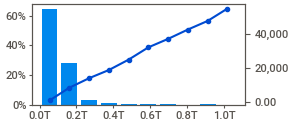
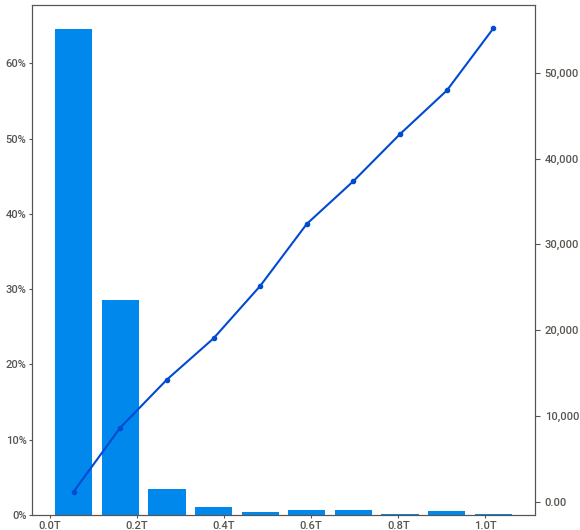
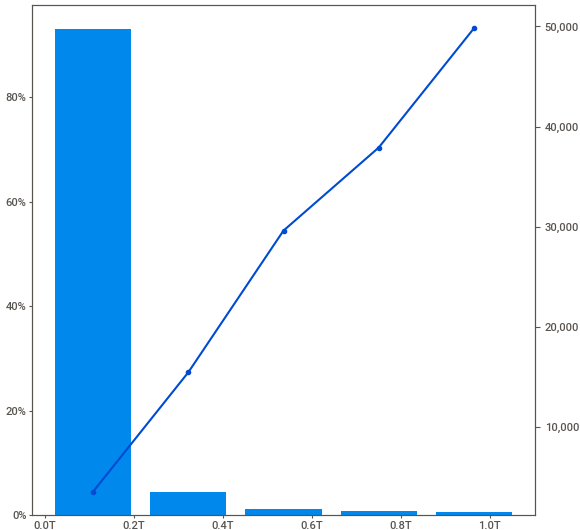
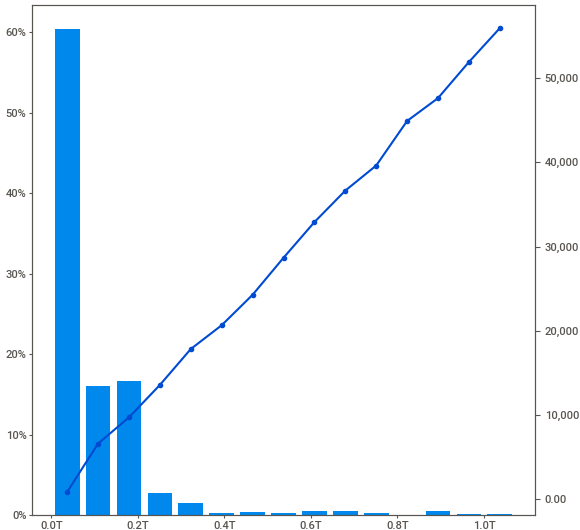
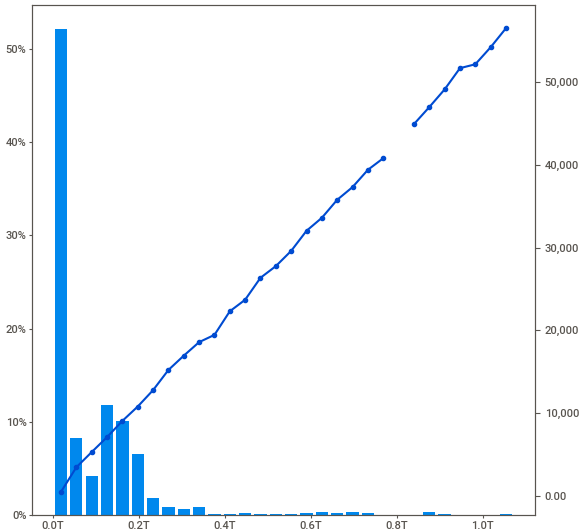
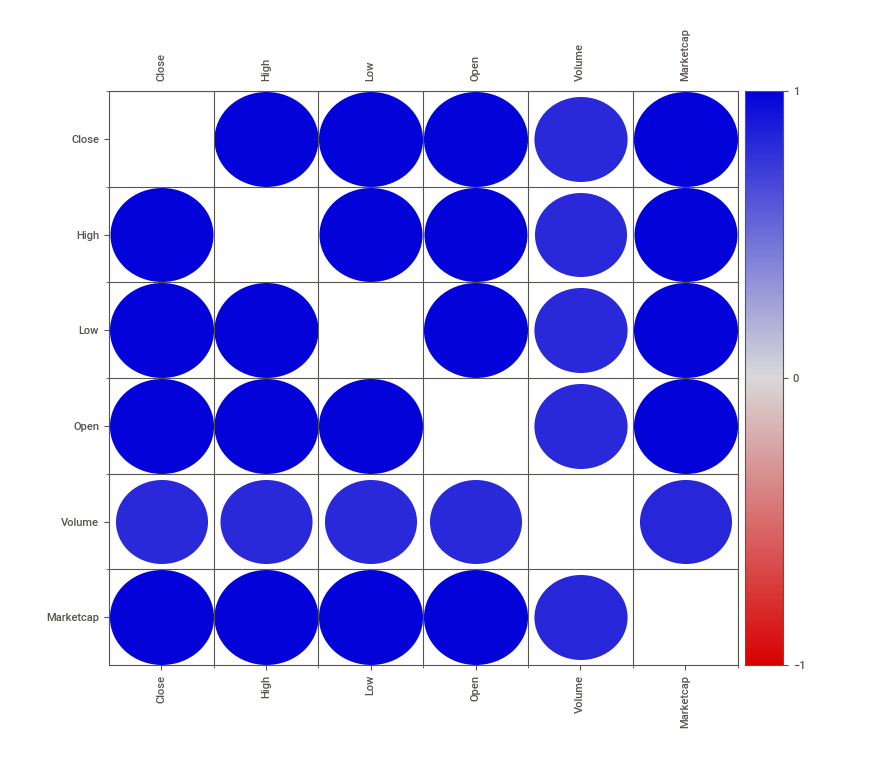
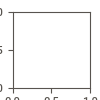

In [4]:
import sweetviz as sv

target_features = input_dataset[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]

analyse_report = sv.analyze([target_features, 'Bitcoin'], target_feat="Close")
analyse_report.show_notebook()

In [5]:
target_features.head()

High         Low        Open       Close  Volume     Marketcap
0  147.488007  134.000000  134.444000  144.539993     0.0  1.603769e+09
1  146.929993  134.050003  144.000000  139.000000     0.0  1.542813e+09
2  139.889999  107.720001  139.000000  116.989998     0.0  1.298955e+09
3  125.599998   92.281898  116.379997  105.209999     0.0  1.168517e+09
4  108.127998   79.099998  106.250000   97.750000     0.0  1.085995e+09

Feature evalution over time

In [6]:
datetime = pd.to_datetime(input_dataset['Date'])
target_features.index = datetime

target_features.iplot(
    subplots=True,
)

In [7]:
target_features.describe().transpose()

count          mean           std           min           25%  \
High       2862.0  4.974040e+03  7.188837e+03  7.456110e+01  4.260478e+02   
Low        2862.0  4.695103e+03  6.667198e+03  6.552600e+01  4.156758e+02   
Open       2862.0  4.836307e+03  6.933573e+03  6.850500e+01  4.212045e+02   
Close      2862.0  4.852093e+03  6.975106e+03  6.843100e+01  4.209892e+02   
Volume     2862.0  8.978475e+09  1.658135e+10  0.000000e+00  2.786250e+07   
Marketcap  2862.0  8.591622e+10  1.287414e+11  7.784112e+08  5.988997e+09   

                    50%           75%           max  
High       1.197335e+03  8.138047e+03  5.833057e+04  
Low        1.164175e+03  7.703358e+03  5.567261e+04  
Open       1.180100e+03  7.924612e+03  5.753274e+04  
Close      1.182810e+03  7.926697e+03  5.753994e+04  
Volume     3.301950e+08  1.296743e+10  3.509679e+11  
Marketcap  1.924238e+10  1.387658e+11  1.072263e+12

Will take only last 4 years, because they mostly interesting

In [8]:
year = 365

years_count = 4
items_count = round(years_count * year)

last_years_dataset = input_dataset[-1 * items_count:]
last_years_datetime = pd.to_datetime(last_years_dataset['Date'])

last_years_dataset.head()
len(last_years_dataset)

SNo     Name Symbol                 Date         High          Low  \
1402  1403  Bitcoin    BTC  2017-03-01 23:59:59  1222.500000  1179.689941   
1403  1404  Bitcoin    BTC  2017-03-02 23:59:59  1262.130005  1215.619995   
1404  1405  Bitcoin    BTC  2017-03-03 23:59:59  1280.310059  1250.709961   
1405  1406  Bitcoin    BTC  2017-03-04 23:59:59  1279.400024  1230.510010   
1406  1407  Bitcoin    BTC  2017-03-05 23:59:59  1267.290039  1238.060059   

             Open        Close       Volume     Marketcap  
1402  1180.040039  1222.500000  229056992.0  1.979446e+10  
1403  1224.680054  1251.010010  368275008.0  2.025854e+10  
1404  1250.709961  1274.989990  315739008.0  2.064926e+10  
1405  1277.430054  1255.150024  183270000.0  2.032998e+10  
1406  1254.290039  1267.119995  134127000.0  2.052624e+10

1460

In [9]:
last_years_features = last_years_dataset[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]
last_years_features.index = last_years_datetime

last_years_features.iplot(
    subplots=True,
)

### Check depenence of trading and price from date in year and time of day

Firstly define function for display frequiency

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_log_freaquency(series):
    fft = tf.signal.rfft(series)    
    f_per_dataset = np.arange(0, len(fft))

    n_samples_d = len(series)
    days_per_year = 365
    years_per_dataset = n_samples_d/(days_per_year)

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale('log')
    plt.xticks([1, 365], labels=['1/Year', '1/day'])
    _ = plt.xlabel('Frequency (log scale)')

Frequency of price

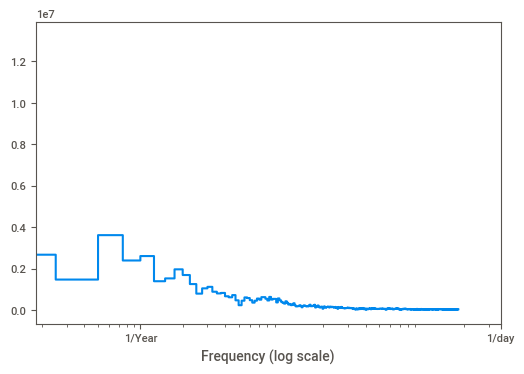

In [18]:
plot_log_freaquency(last_years_dataset['Close'])

Frequency of transaction volume

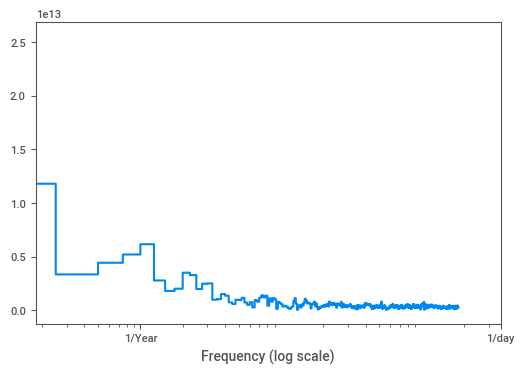

In [19]:
plot_log_freaquency(last_years_dataset['Volume'])

## Compare train and test datasets

In [11]:
from src.load_datasets import load_datasets

train_df, test_df = load_datasets()

train_df

SNo     Name Symbol                 Date         High          Low  \
1402  1403  Bitcoin    BTC  2017-03-01 23:59:59  1222.500000  1179.689941   
1403  1404  Bitcoin    BTC  2017-03-02 23:59:59  1262.130005  1215.619995   
1404  1405  Bitcoin    BTC  2017-03-03 23:59:59  1280.310059  1250.709961   
1405  1406  Bitcoin    BTC  2017-03-04 23:59:59  1279.400024  1230.510010   
1406  1407  Bitcoin    BTC  2017-03-05 23:59:59  1267.290039  1238.060059   
...    ...      ...    ...                  ...          ...          ...   
2565  2566  Bitcoin    BTC  2020-05-07 23:59:59  9992.663921  9138.322572   
2566  2567  Bitcoin    BTC  2020-05-08 23:59:59  9996.743353  9767.173070   
2567  2568  Bitcoin    BTC  2020-05-09 23:59:59  9913.862993  9580.644492   
2568  2569  Bitcoin    BTC  2020-05-10 23:59:59  9595.580629  8395.107451   
2569  2570  Bitcoin    BTC  2020-05-11 23:59:59  9033.471176  8374.322975   

             Open        Close        Volume     Marketcap  
1402  1180.040039  1222.500000  2.290570e+08  1.979446e+10  
1403  1224.680054  1251.010010  3.682750e+08  2.025854e+10  
1404  1250.709961  1274.989990  3.157390e+08  2.064926e+10  
1405  1277.430054  1255.150024  1.832700e+08  2.032998e+10  
1406  1254.290039  1267.119995  1.341270e+08  2.052624e+10  
...           ...          ...           ...           ...  
2565  9261.895058  9951.518745  6.111270e+10  1.827874e+11  
2566  9936.162482  9842.666368  5.178075e+10  1.808049e+11  
2567  9840.906384  9593.896734  4.656612e+10  1.762514e+11  
2568  9591.169231  8756.431142  6.332528e+10  1.608848e+11  
2569  8755.535639  8601.796202  5.711986e+10  1.580592e+11  

[1168 rows x 10 columns]

                                             |          | [  0%]   00:00 -> (? left)


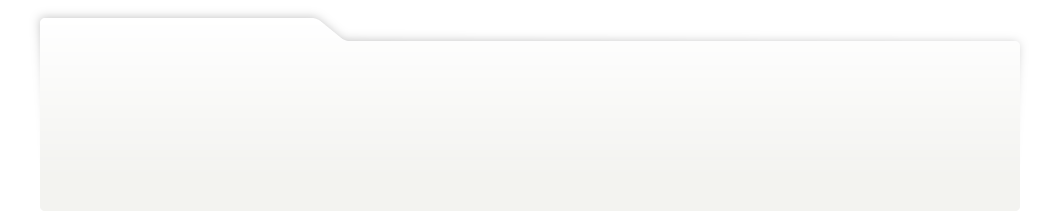
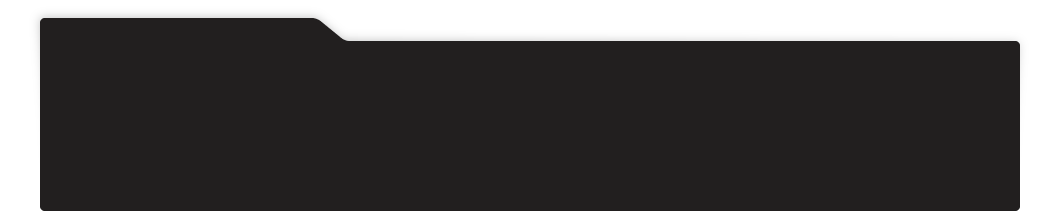
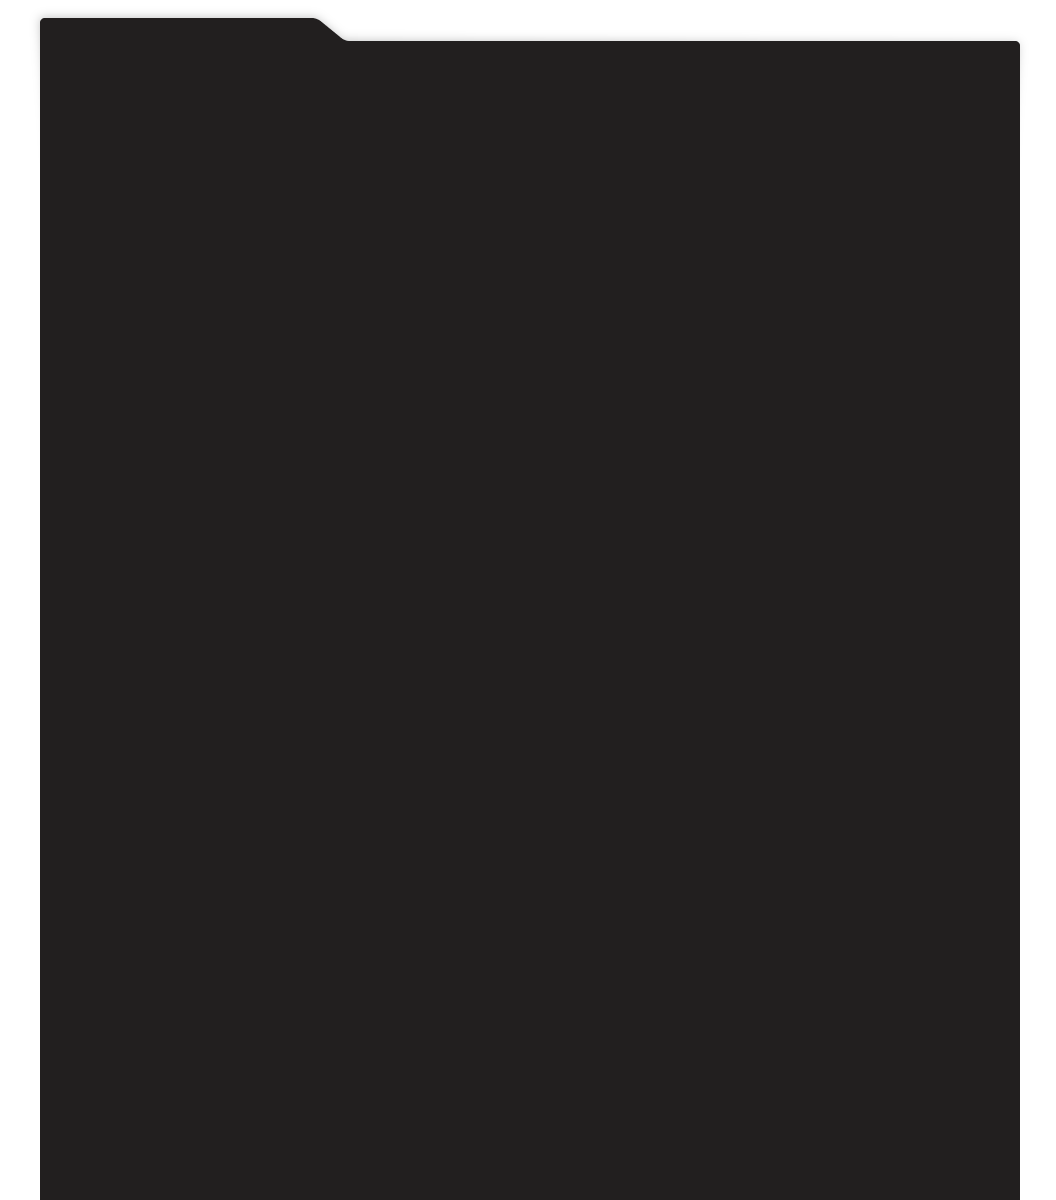
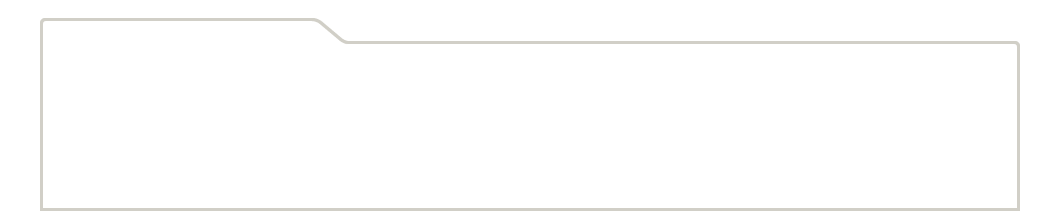
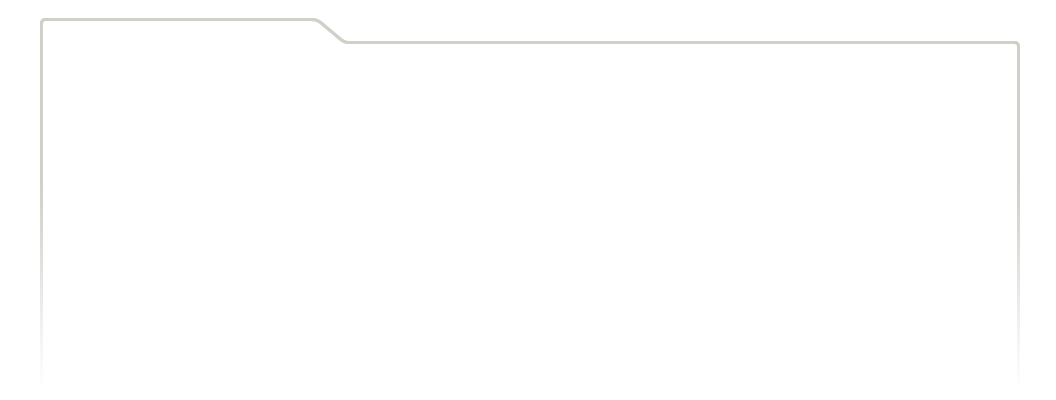
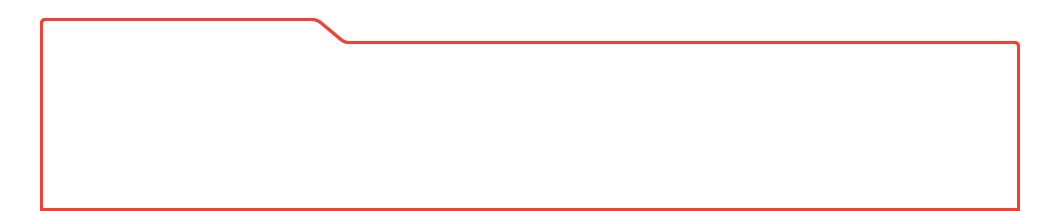
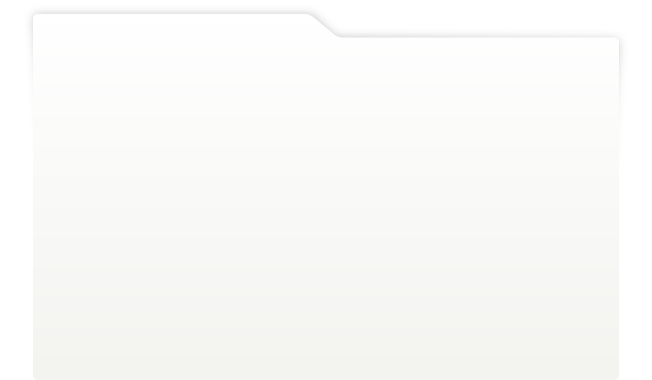
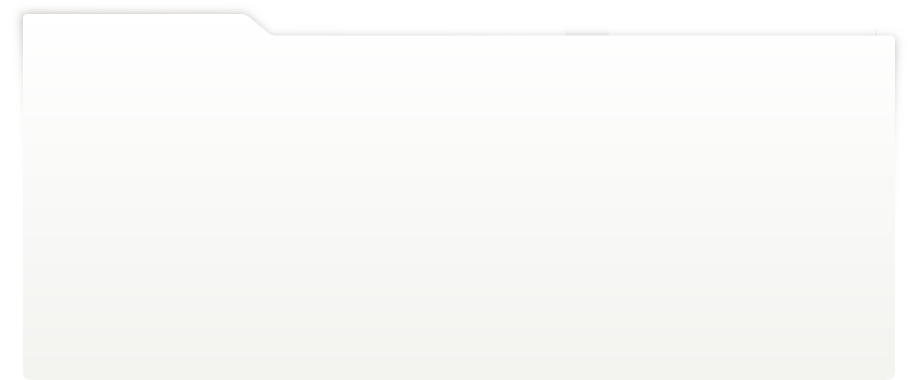
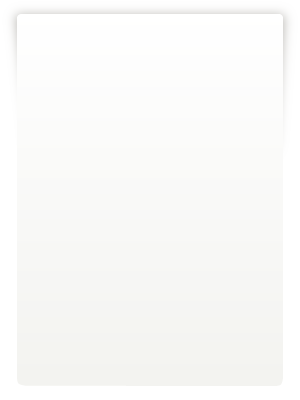
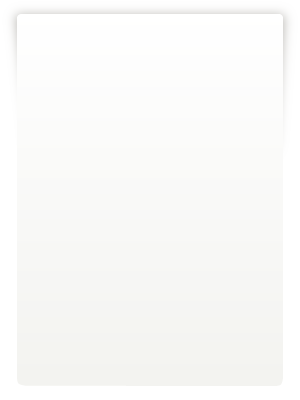
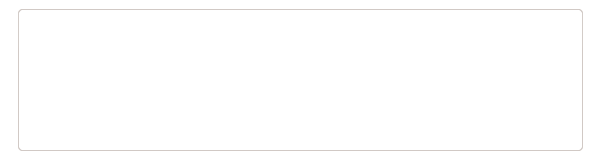
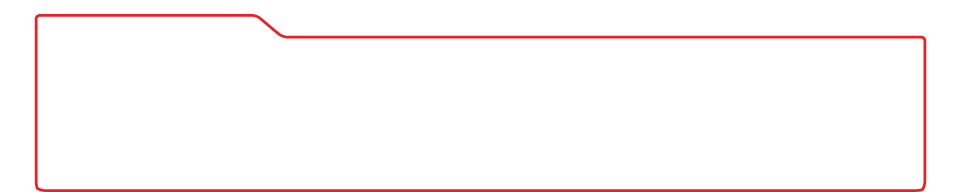
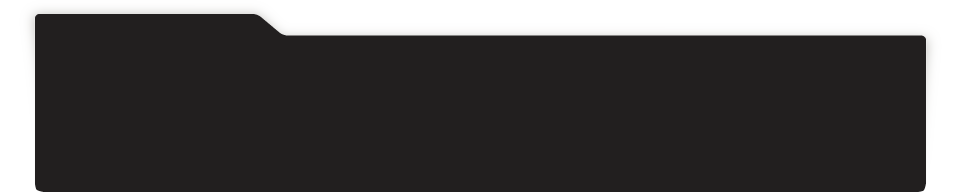
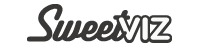
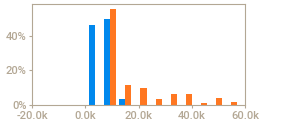
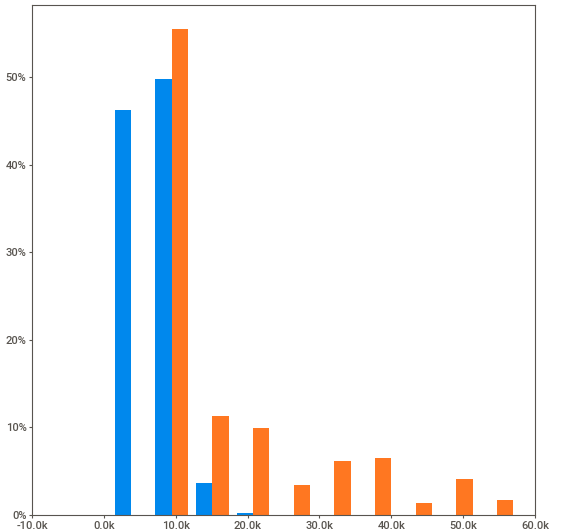
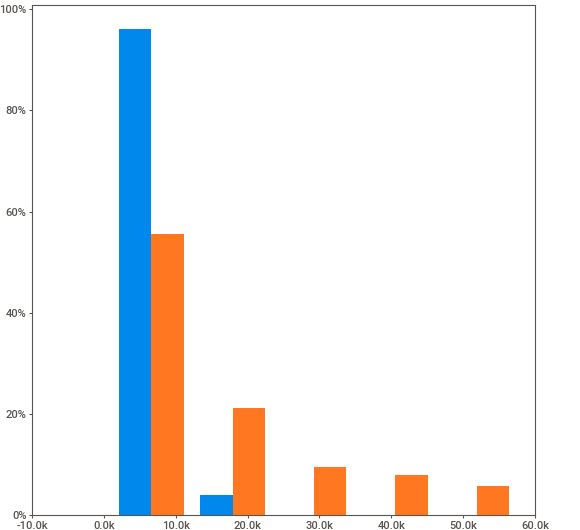
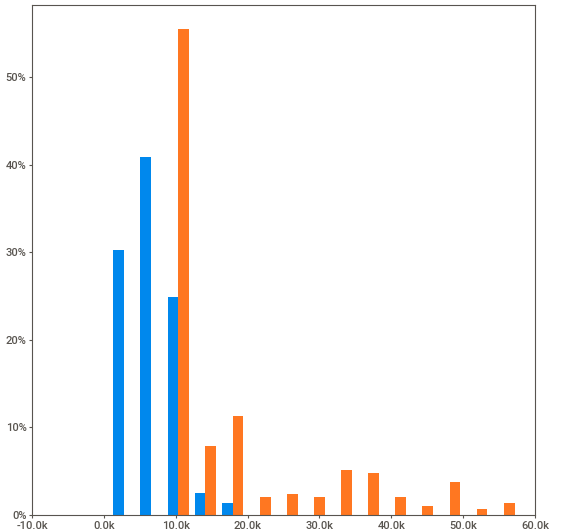
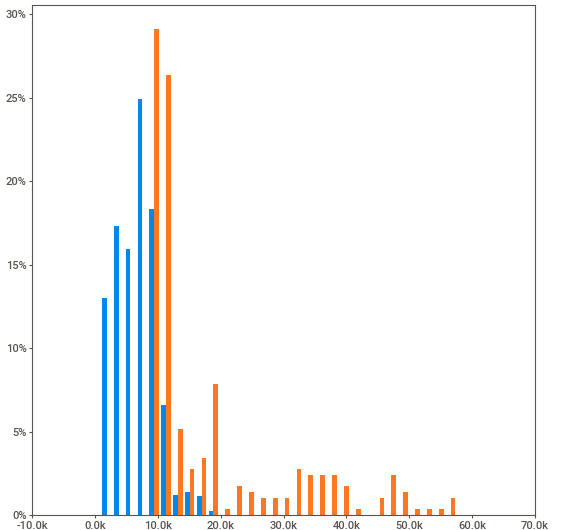
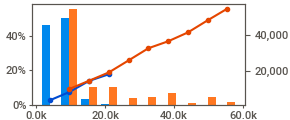
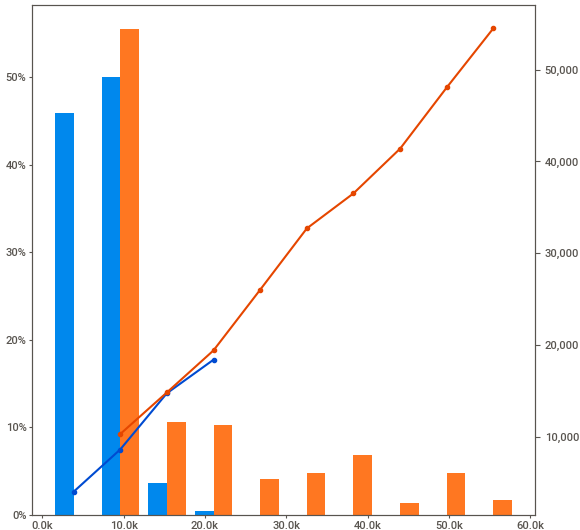
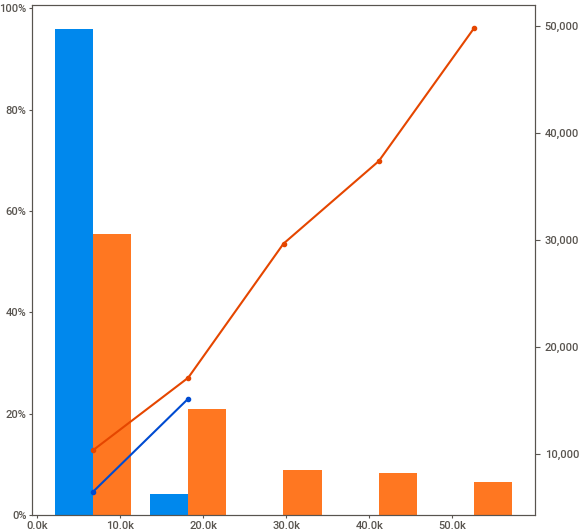
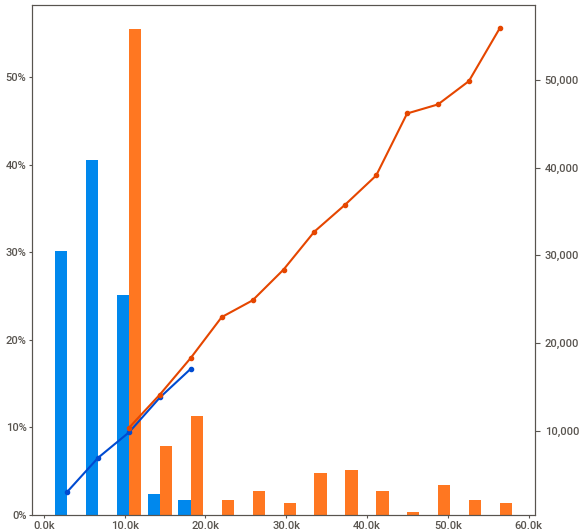
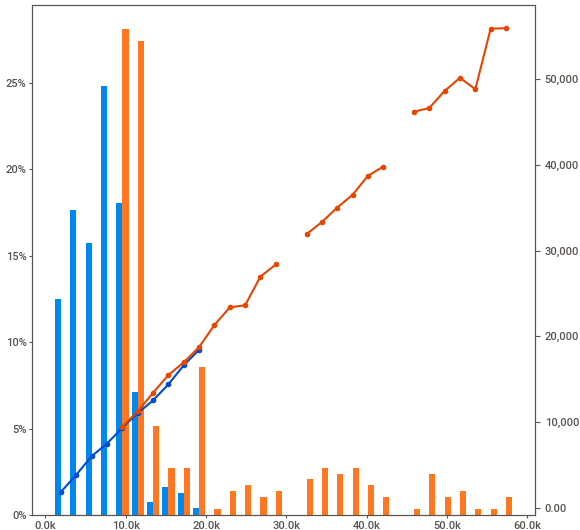
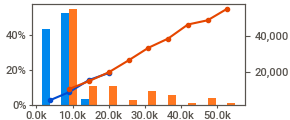
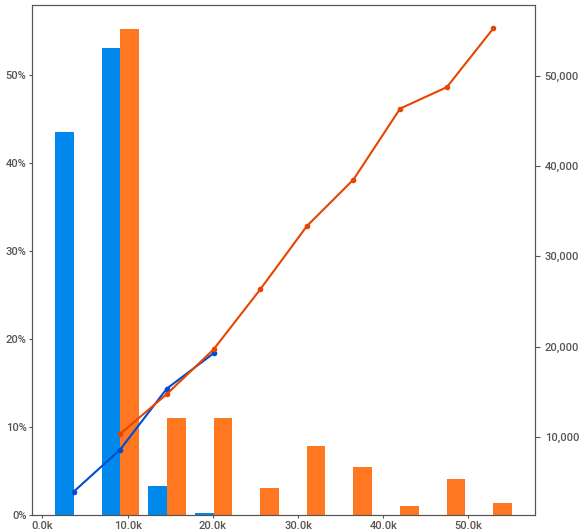
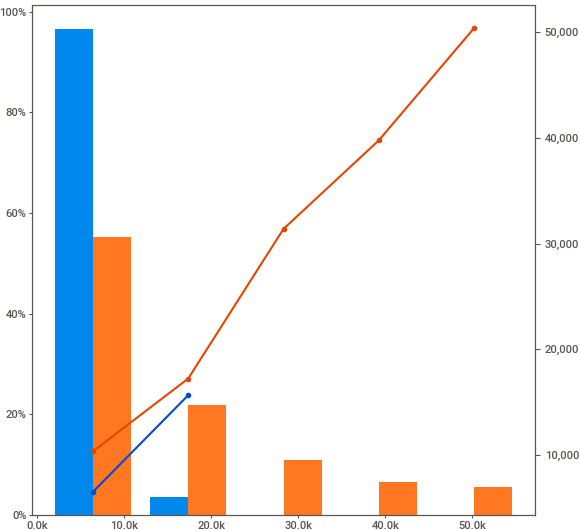
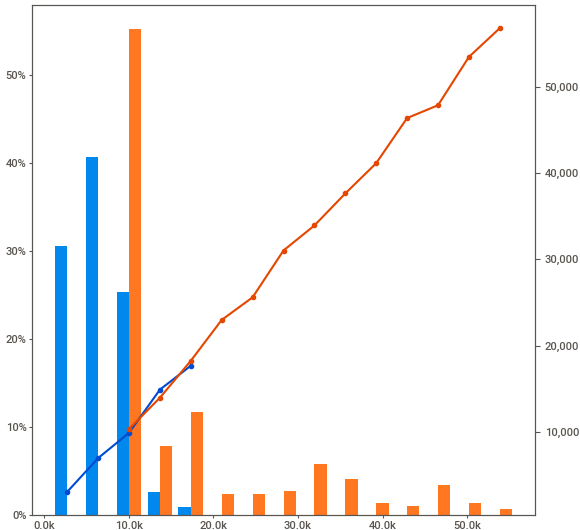
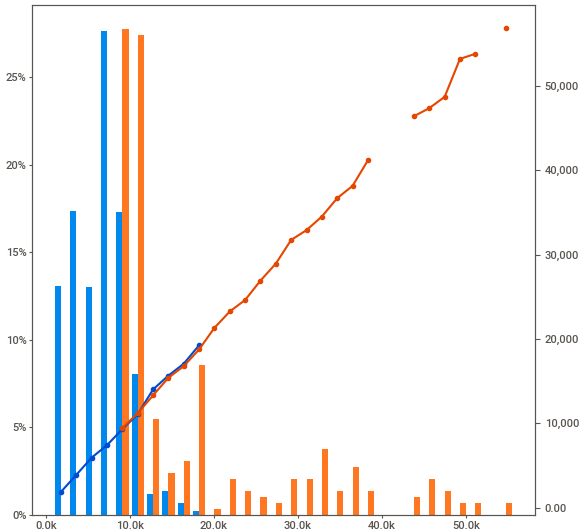
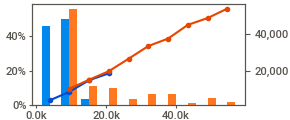
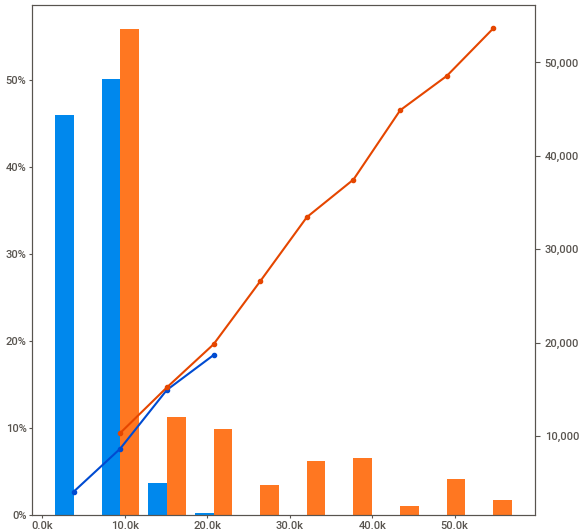
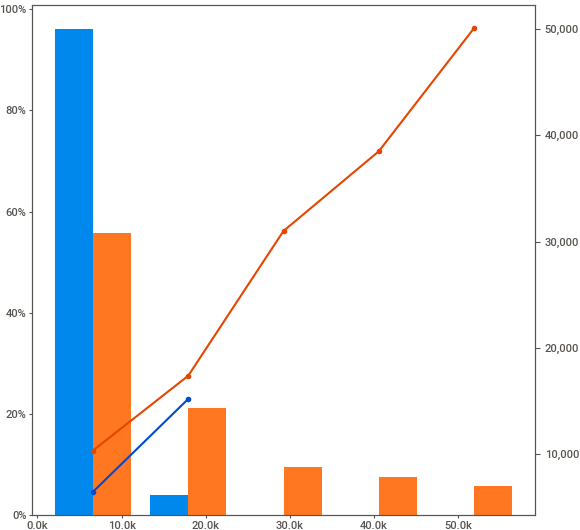
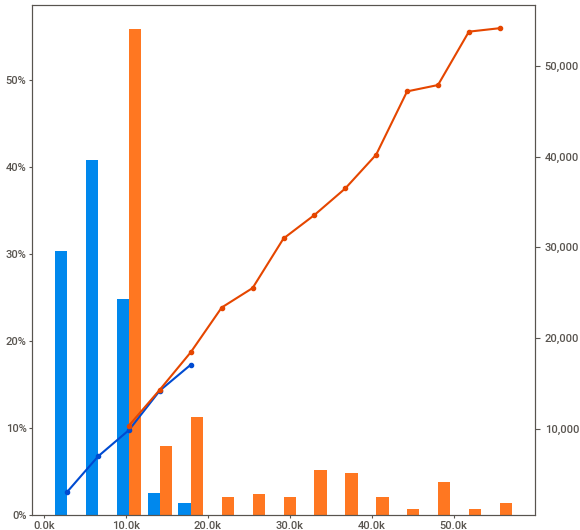
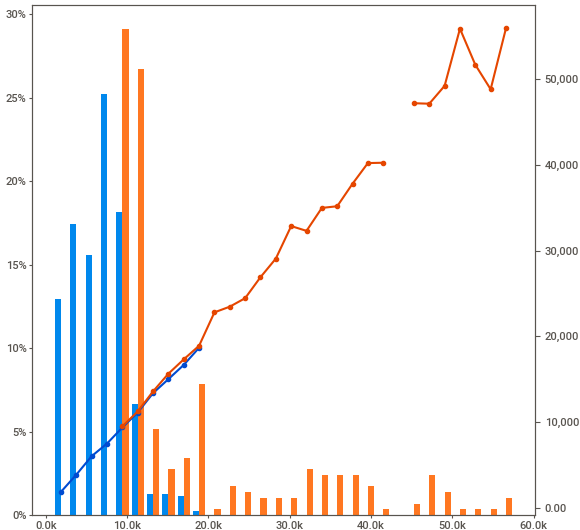
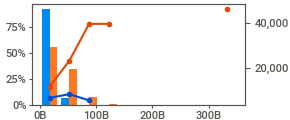
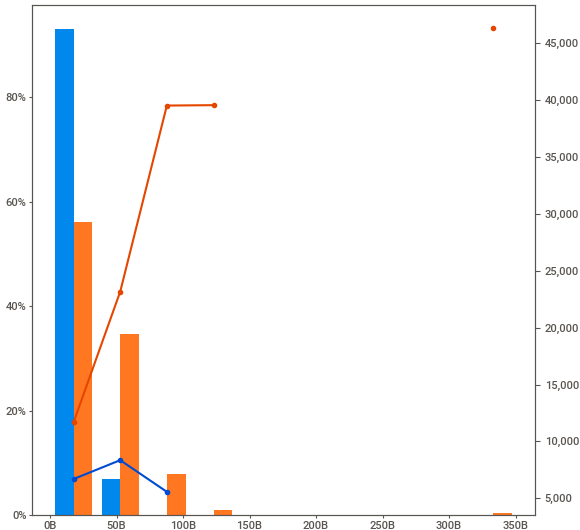
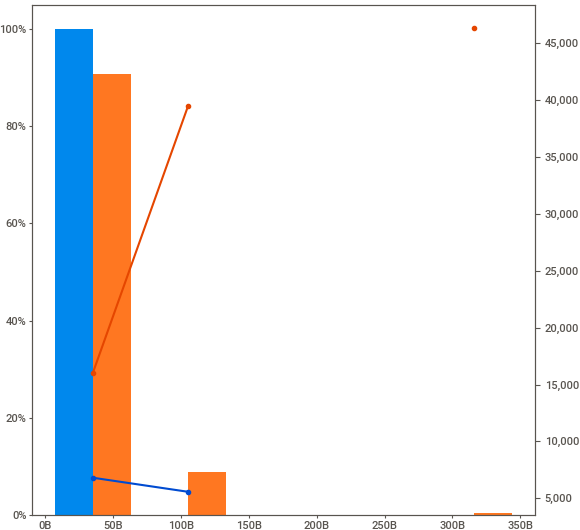
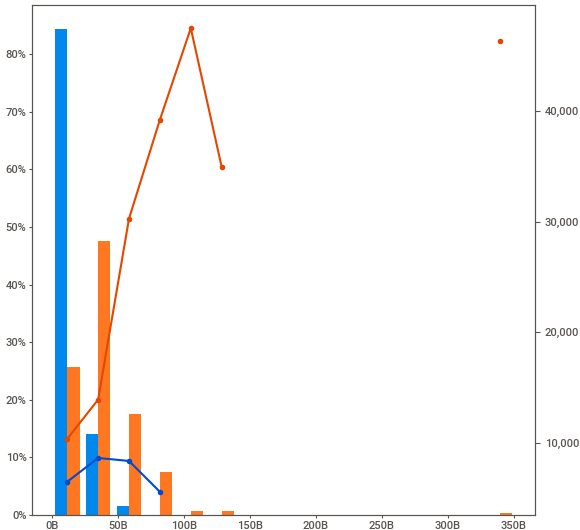
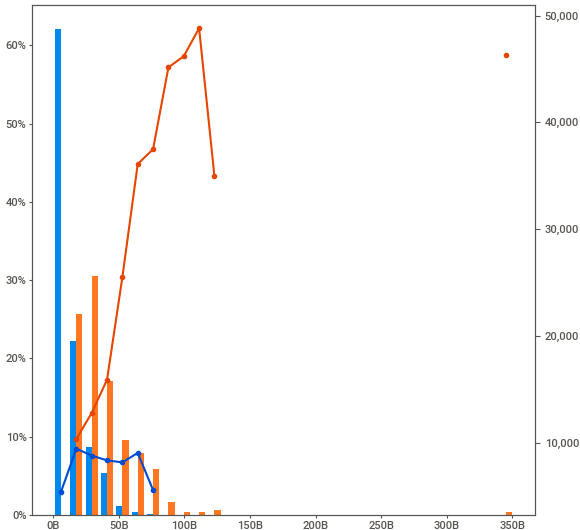
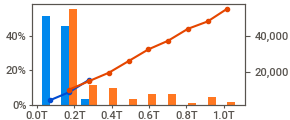
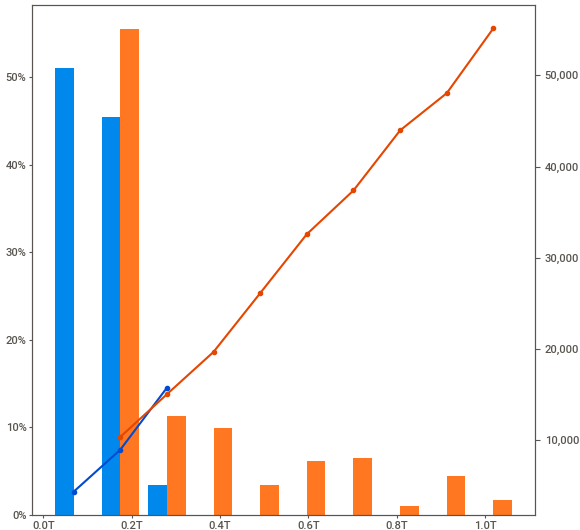
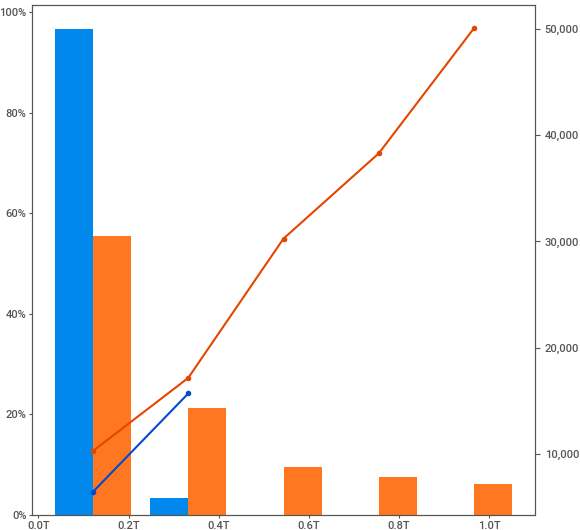
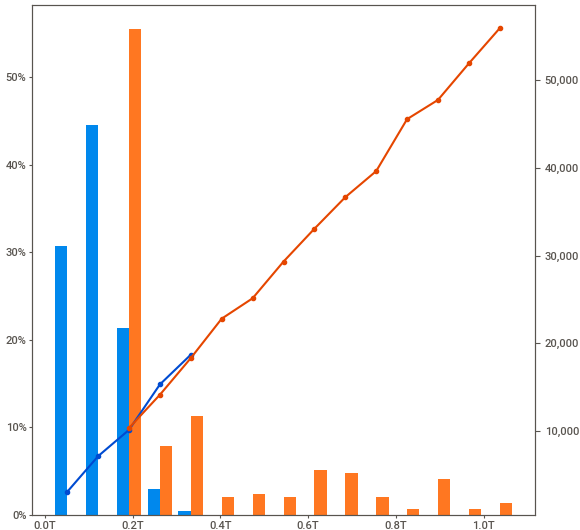
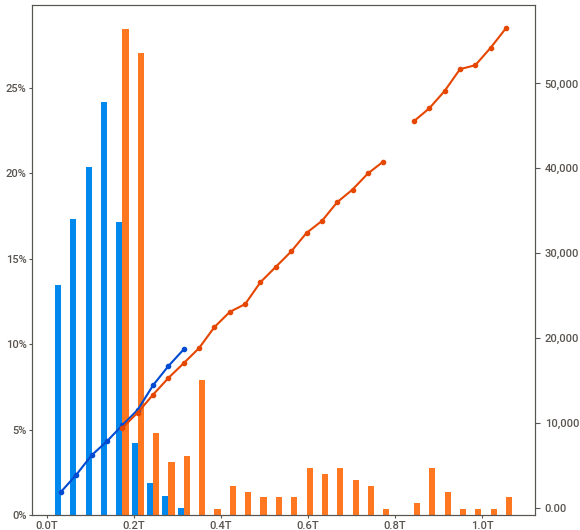
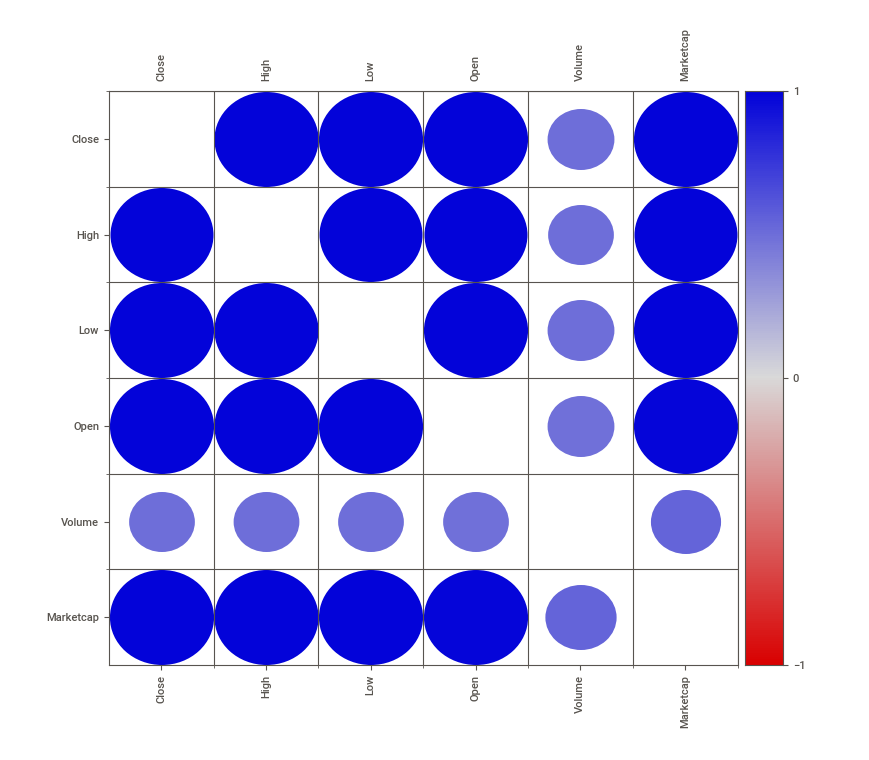
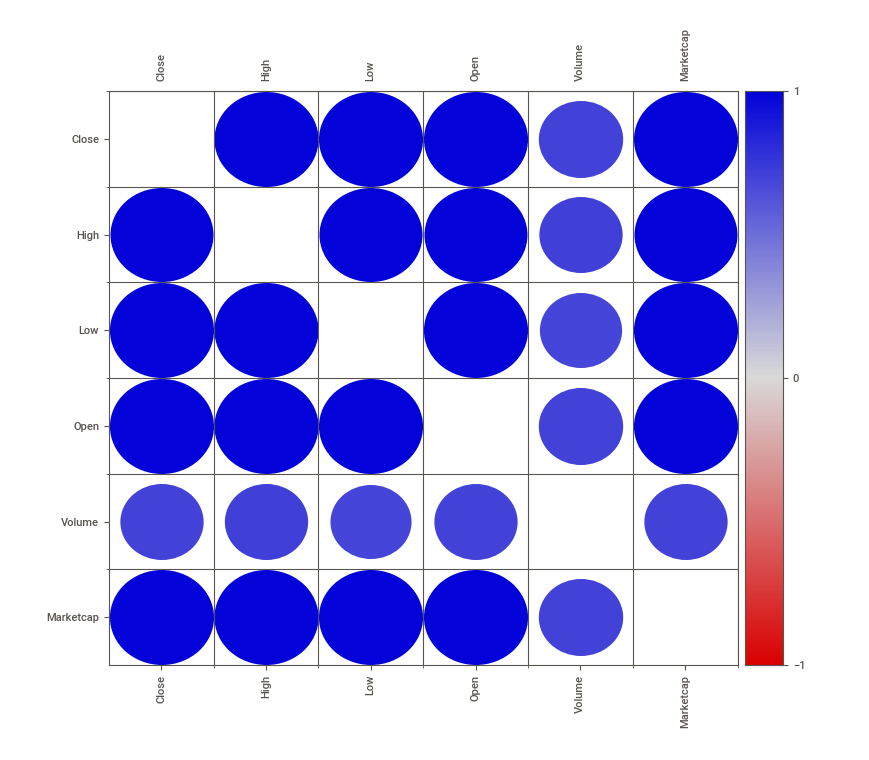

In [12]:
feature_list = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

train_features = train_df[feature_list]
test_features = test_df[feature_list]

compare_report = sv.compare([train_features, 'Train data'], [test_features, 'Test data'], "Close")
compare_report.show_notebook()

In [13]:
train_datetime = pd.to_datetime(train_df['Date'])
test_datetime = pd.to_datetime(test_df['Date'])

train_features.index = train_datetime
test_features.index = test_datetime

### Training data exploration

In [14]:
train_features.iplot(subplots=True)

### Testing data exploration

In [15]:
test_df

SNo     Name Symbol                 Date          High           Low  \
2570  2571  Bitcoin    BTC  2020-05-12 23:59:59   8949.897979   8569.643988   
2571  2572  Bitcoin    BTC  2020-05-13 23:59:59   9317.878554   8805.387813   
2572  2573  Bitcoin    BTC  2020-05-14 23:59:59   9793.268209   9255.034846   
2573  2574  Bitcoin    BTC  2020-05-15 23:59:59   9755.828498   9261.398000   
2574  2575  Bitcoin    BTC  2020-05-16 23:59:59   9564.204989   9260.694163   
...    ...      ...    ...                  ...           ...           ...   
2857  2858  Bitcoin    BTC  2021-02-23 23:59:59  54204.929756  45290.590268   
2858  2859  Bitcoin    BTC  2021-02-24 23:59:59  51290.136695  47213.498162   
2859  2860  Bitcoin    BTC  2021-02-25 23:59:59  51948.966982  47093.853019   
2860  2861  Bitcoin    BTC  2021-02-26 23:59:59  48370.785260  44454.842114   
2861  2862  Bitcoin    BTC  2021-02-27 23:59:59  48253.270101  45269.025766   

              Open         Close        Volume     Marketcap  
2570   8610.386212   8804.477811  4.214272e+10  1.617916e+11  
2571   8805.387813   9269.987706  4.555814e+10  1.703527e+11  
2572   9271.328638   9733.721471  5.642691e+10  1.788816e+11  
2573   9734.290775   9328.197226  4.815880e+10  1.714363e+11  
2574   9333.239873   9377.014026  3.616477e+10  1.723410e+11  
...            ...           ...           ...           ...  
2857  54204.929756  48824.426869  1.061025e+11  9.099259e+11  
2858  48835.087661  49705.333316  6.369552e+10  9.263931e+11  
2859  49709.082425  47093.853019  5.450657e+10  8.777661e+11  
2860  47180.464054  46339.760083  3.509679e+11  8.637523e+11  
2861  46344.772237  46188.451275  4.591095e+10  8.609781e+11  

[292 rows x 10 columns]

In [16]:
test_features.iplot(subplots=True)

## Normalise data

Will use only training mean and deviation for not give NN access to test dataset

Subtract the mean and divide by the standard deviation of each feature will give required normalisation

In [17]:
train_mean = train_features.mean()
train_std = train_features.std()

train_features = (train_features - train_mean) / train_std
test_features = (test_features - train_mean) / train_std

In [18]:
train_features

High       Low      Open     Close    Volume  \
Date                                                                    
2017-03-01 23:59:59 -1.700268 -1.744181 -1.720713 -1.711503 -0.967220   
2017-03-02 23:59:59 -1.688553 -1.732598 -1.707019 -1.702748 -0.955925   
2017-03-03 23:59:59 -1.683178 -1.721287 -1.699034 -1.695383 -0.960187   
2017-03-04 23:59:59 -1.683447 -1.727798 -1.690837 -1.701476 -0.970934   
2017-03-05 23:59:59 -1.687027 -1.725364 -1.697936 -1.697800 -0.974921   
...                       ...       ...       ...       ...       ...   
2020-05-07 23:59:59  0.892399  0.821360  0.758554  0.969285  3.972216   
2020-05-08 23:59:59  0.893605  1.024076  0.965399  0.935855  3.215123   
2020-05-09 23:59:59  0.869104  0.963947  0.936177  0.859455  2.792065   
2020-05-10 23:59:59  0.775012  0.581778  0.859565  0.602259  4.151721   
2020-05-11 23:59:59  0.608839  0.575078  0.603218  0.554769  3.648280   

                     Marketcap  
Date                            
2017-03-01 23:59:59  -1.731125  
2017-03-02 23:59:59  -1.722970  
2017-03-03 23:59:59  -1.716104  
2017-03-04 23:59:59  -1.721715  
2017-03-05 23:59:59  -1.718266  
...                        ...  
2020-05-07 23:59:59   1.132952  
2020-05-08 23:59:59   1.098116  
2020-05-09 23:59:59   1.018103  
2020-05-10 23:59:59   0.748084  
2020-05-11 23:59:59   0.698434  

[1168 rows x 6 columns]

In [19]:
train_features.iplot(subplots=True)

In [20]:
test_features.iplot(subplots=True)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_normalised(df):
    df_std = (df - train_mean) / train_std
    df_std = df_std.melt(var_name='Column', value_name='Normalized')
    # plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Column', y='Normalized', data=df_std)

ModuleNotFoundError: No module named 'seaborn'

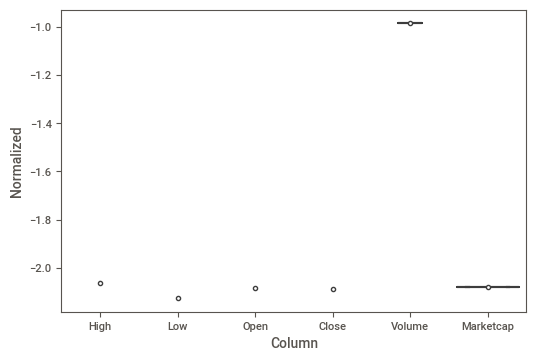

In [21]:
show_normalised(train_features)

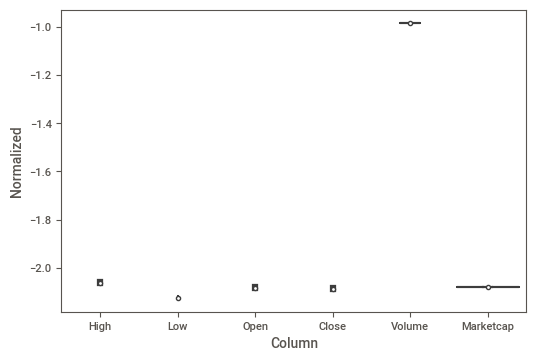

In [24]:
show_normalised(test_features)

## Check window generator

In [3]:
from src.prepare_datasets import get_prepared_datasets
from src.window_generator import WindowGenerator

train_df, test_df = get_prepared_datasets()
w1 = WindowGenerator(
    input_width=24, label_width=1, shift=24, 
    train_df=train_df, test_df=test_df, 
    label_columns=['Close']
)

w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

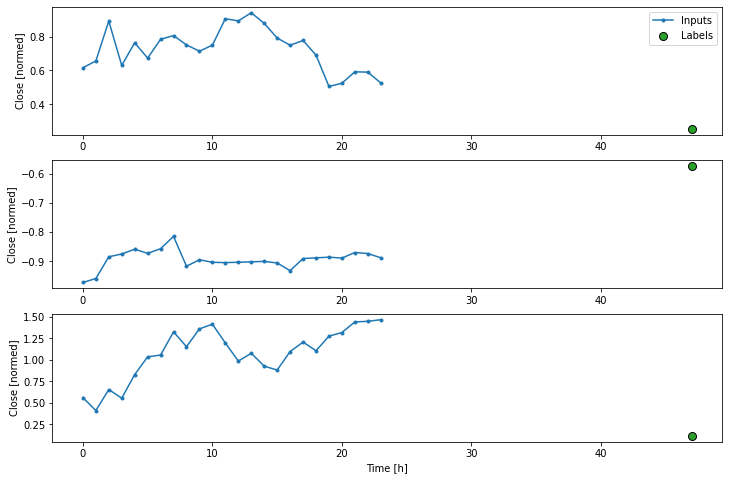

In [4]:
w1.plot(plot_col='Close')

In [5]:
w1.train.element_spec

(TensorSpec(shape=(None, 24, 4), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

## Try baseline model

In [6]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, test_df=test_df, 
    label_columns=['Close'])

single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Close']

In [7]:
import tensorflow as tf
from src.BaselineModel import Baseline

column_indices = {name: i for i, name in enumerate(train_df.columns)}

baseline = Baseline(label_index=column_indices['Close'])
    
baseline.compile(
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()]
)


performance = {}
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 0.1155 - mean_absolute_error: 0.1701


In [8]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    train_df=train_df, test_df=test_df,
    label_columns=['Close'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['Close']

In [9]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 4)
Output shape: (32, 30, 1)


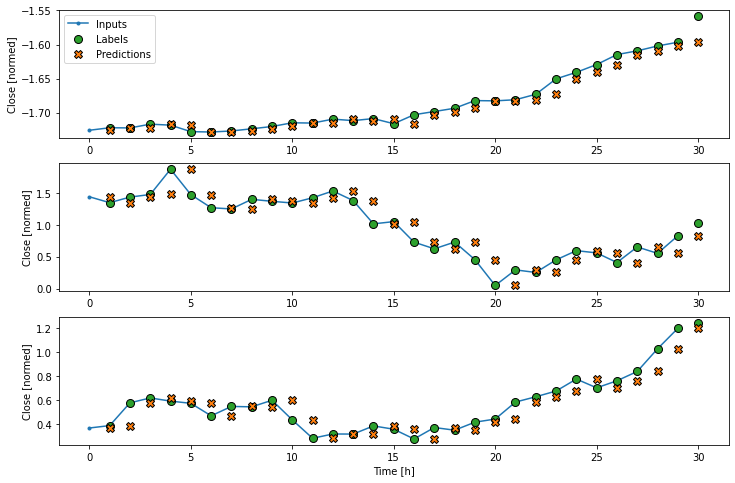

In [10]:
wide_window.plot(baseline)

In [11]:
from src.libs import load

model = load()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 32)             4736      
_________________________________________________________________
dense (Dense)                (None, 8, 1)              33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


Try plot model

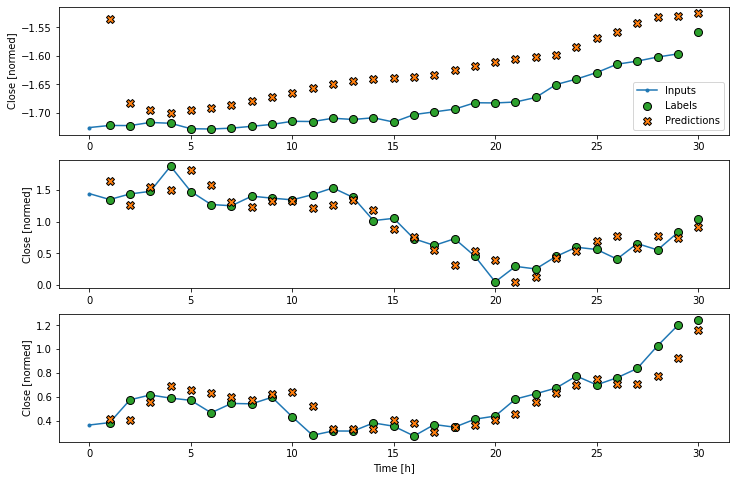

In [12]:


wide_window.plot(model)

In [7]:
OUT_STEPS=30
multi_window = WindowGenerator(
    input_width=30, label_width=OUT_STEPS, shift=OUT_STEPS,
    train_df=train_df, test_df=test_df, 
    label_columns=['Close'])

multi_window

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): ['Close']

8/8 [==============================] - 0s 1ms/step - loss: 3.3862 - mean_absolute_error: 1.2062


[3.7446911334991455, 1.2658274173736572]

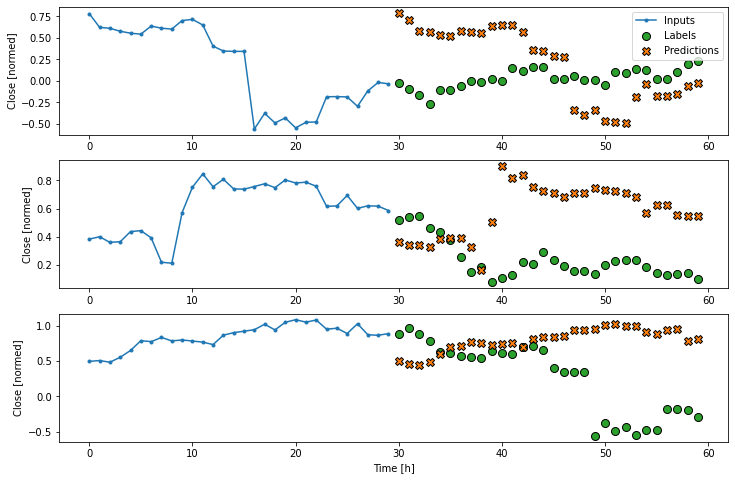

In [16]:
import tensorflow as tf
from src.RepeatBaselineModel import RepeatBaseline

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

repeat_baseline.evaluate(multi_window.test, verbose=1)
multi_window.plot(repeat_baseline)

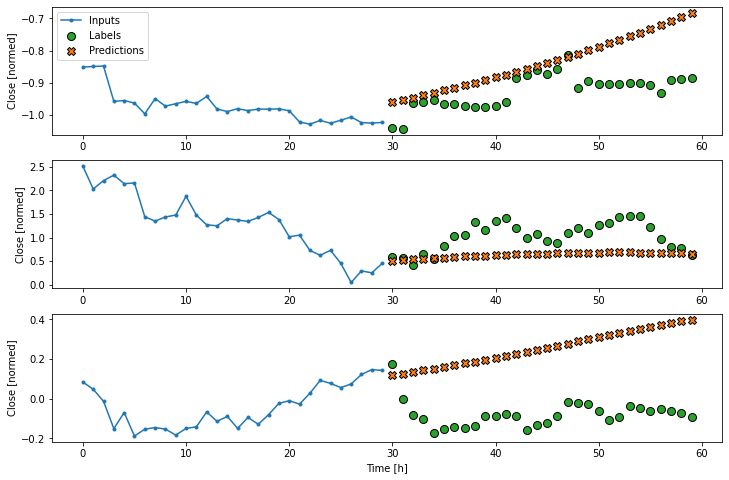

In [8]:
from src.libs import load_custom
from src.model import build_model

model = build_model()

load_custom(model)

multi_window.plot(model)

## Explore training metrics

In [13]:
df = pd.read_csv('./metrics/training.csv')
df.head()

epoch      loss  mean_absolute_error   val_loss  val_mean_absolute_error
0      0  6.671871             2.075876  96.813873                 7.259118
1      1  6.018662             1.971393  89.065636                 6.956074
2      2  5.415665             1.869535  81.649574                 6.651630
3      3  4.866190             1.770316  74.771553                 6.357752
4      4  4.361133             1.674293  68.412422                 6.072542

In [14]:
df[['epoch', 'loss', 'val_loss']].iplot(
    x='epoch',
    mode='lines+markers',
    xTitle='epoch',
    yTitle='loss', 
    title='Training loss',
    linecolor='black',
)

In [15]:
df[['epoch', 'mean_absolute_error', 'val_mean_absolute_error']].iplot(
    x='epoch',
    mode='lines+markers',
    xTitle='epoch',
    yTitle='mean_absolute_error', 
    title='mean_absolute_error'
)

## Predictions

### Load probability model

which can give predictions on model classes

0 - bad review, 1 - good revie

In [ ]:
from src.predict import get_probability_model

model = get_probability_model()

**Firstly will try predict on some data from training dataset**

In [ ]:
from src.predict import get_text_and_label_from_dataset, predict
REVIEW_INDEX = 110

text, real_label = get_text_and_label_from_dataset(REVIEW_INDEX)

print('text for prediction\n\n', text, '\n')

predicted_label, predictions = predict(text, model)

print(label_categories[predicted_label], 'review')

print('\n\nPredicted label:', predicted_label, 'real label: ', real_label, 'predictions:', predictions)
if (predicted_label == real_label):
    print('Successfully predicted')
else:
    print('Failed to predict')

**Then will try predict hadnwritten text**

In [ ]:
# Can change text and check model
hadwriten = 'This is good film'

print('Hendwriten text:\n', hadwriten, '\n')

handwriten_label, predictions = predict(hadwriten, model)

print(label_categories[predicted_label], 'review')

print('Probabilities', predictions)
